In [5]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

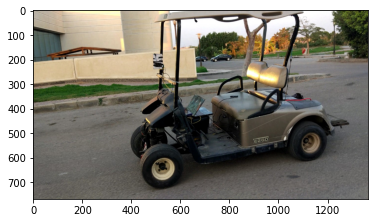

In [89]:
img = cv2.imread('./carkyo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

---
# TASK 1
---

---
## changing Hue
---

179
255


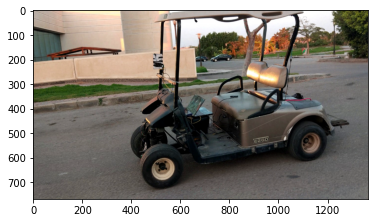

In [90]:
img = cv2.imread('./carkyo.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv[:,:,0].max())
hsv[:,:,0] = hsv[:,:,0] - 5
print(hsv[:,:,0].max())
hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(hsv);

* the output image colrs are shifted to the opposeite of yellow yellow ( the original image compared to the new image look like it has a yellow filter ) 
* Purple is the opposeite of yellow  purble >> (153,50,204) i tried to make a puplr image and add it using cv2.addWeighted
* i know this is not correct bcz this purple color is yellow colors shifted to purple not all colors shifted to purple

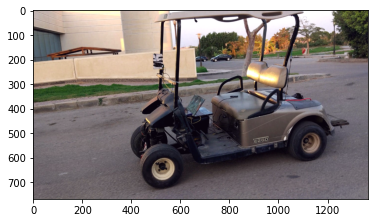

In [94]:
img = cv2.imread('./carkyo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out[:,:,0] = 153
out[:,:,1] = 50
out[:,:,2] = 240
plt.imshow(out)
dst = cv2.addWeighted(img,1,out,.05,0)
plt.imshow(dst);

* 

---
## changing saturation
---

255
255


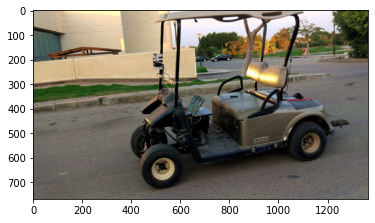

In [97]:
img = cv2.imread('./carkyo.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv[:,:,1].max())
hsv[:,:,1] = hsv[:,:,1] + 10
print(hsv[:,:,1].max())
hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(hsv);

* all colors seems less white and look more colory
red -> more red
green -> more green
blue -> more blue


---
## changing value
---

255


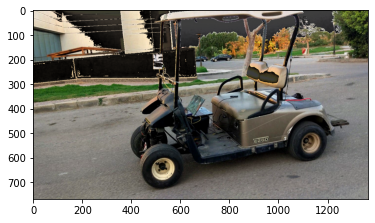

In [122]:
img = cv2.imread('./carkyo.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

print(hsv[:,:,2].max())

hsv[:,:,2] = hsv[:,:,2] * 1.25

hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(hsv);

* when we mutiply the Value in hsv the very bright points are already = 255 >> print(hsv[:,:,2].max())
* so they over flow and become very small Value >> dark areas

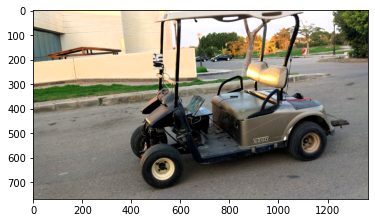

In [254]:
img = cv2.imread('./carkyo.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

for i in range (0,hsv[:,:,2].shape[0]):
    for j in range (0,hsv[:,:,2].shape[1]):
        if(hsv[i,j,2] * 1.25 > 255):
            hsv[i,j,2] = 255
        else:
            hsv[i,j,2] = hsv[i,j,2] * 1.25

hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(hsv);

---
# TASk 2
---

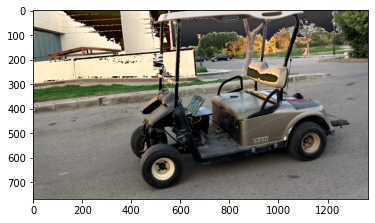

In [157]:
img = cv2.imread('./carkyo.jpg')
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

ycrcb[:,:,0] = ycrcb[:,:,0] * 1.25

ycrcb = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)
plt.imshow(ycrcb);

In [156]:
x.shape

()

* same problem in v in hsv
* the Y values overflow and become dark

time taken = 7.29268217086792


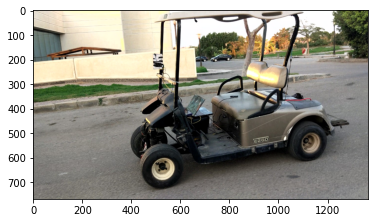

In [252]:
# solution using for loops

import time

img = cv2.imread('./carkyo.jpg')
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

before = time.time()
for i in range (0,ycrcb[:,:,0].shape[0]):
    for j in range (0,ycrcb[:,:,0].shape[1]):
        if(ycrcb[i,j,0] * 1.25 > 255):
            ycrcb[i,j,0] = 255
        else:
            ycrcb[i,j,0] = ycrcb[i,j,0] * 1.25

print("time taken = "+ str(time.time()  - before) )


ycrcb = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)
plt.imshow(ycrcb);

## vectorized solution 
---

time taken = 0.01024174690246582


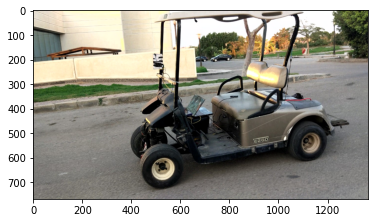

In [253]:
# solution using numpy vectorization

import time
img = cv2.imread('./carkyo.jpg')
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
ycrcbcopy = ycrcb.copy()

before = time.time()
ycrcbcopy[:,:,0] = ycrcbcopy[:,:,0] * 1.25
ycrcbcopy[:,:,0][ ycrcb[:,:,0] *1.25 > 255 ]=255
print("time taken = "+ str(time.time()  - before) )

ycrcbcopy = cv2.cvtColor(ycrcbcopy, cv2.COLOR_YCrCb2RGB)
plt.imshow(ycrcbcopy);